In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt

##### Prepare and Merge the Data

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
# get all the file names in the directory
files = os.listdir('rain_data')
#For all the file in the rain_data directory, drop the 'Unnamed 0' column, and change Date column name to Local Date
for file in files:
    df = pd.read_csv('rain_data/' + file)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    df.rename(columns={'Date': 'Date Local'}, inplace=True)
    df.to_csv('rain_data/' + file, index=False)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'rain_data'

In [ ]:
import os
# get all the file names in the directory
files = os.listdir('rain_data')

#for all the files in the rain_data directory, eliminate all rows with date < 2001-01-01
for file in files:
    df = pd.read_csv('rain_data/' + file)
    df = df[df['Date Local'] >= '2001-01-01']
    df.to_csv('rain_data/' + file, index=False)


In [ ]:
def mergingDataframes(cityName):
    cityWeather = pd.read_csv('rain_data/' + cityName + '.csv')
    cityData = pd.read_csv(cityName + '.csv')
    df = pd.merge(cityData, cityWeather, on=['Date Local'], how='inner')
    df['Year'] = pd.to_datetime(df['Date Local']).dt.year
    df['Average Temperature'] = (df['tmax'] + df['tmin']) / 2
    #delete City Name_y, and rename City Name_x to City Name
    # df.drop(['City Name_y'], axis=1, inplace=True)
    # df.rename(columns={'City Name_x': 'City Name'}, inplace=True)
    #drop duplicates
    df.drop_duplicates(inplace=True)
    # Ensure 'Date Local' is a datetime object
    df['Date Local'] = pd.to_datetime(df['Date Local'])

    # Group by 'Date Local' and preserve other columns
    grouped_df = (
        df.groupby('Date Local', as_index=False)
        .agg({
            'Average Temperature': 'mean',  # Calculate the mean of Average Temperature
            'Ozone Arithmetic Mean': 'mean',  # Example: Mean of numerical column
            # 'State Name': 'first',  # Keep the first value (assuming all are the same for a date)
            # 'City Name': 'first',   # Same as above
            # 'Site Num': 'first',    # Example: Keep the first value
            'Carbon Arithmetic Mean': 'mean',  # Example: Mean of numerical column
            'tmax': 'mean',         # Mean of tmax
            'tmin': 'mean',         # Mean of tmin
            'prcp': 'mean',         # Mean of prcp
            'Year': 'first'         # Keep the first year
        })
    )

    grouped_df.to_csv(cityName + '.csv', index=False)
mergingDataframes('Austin')


##### Check Data Trends

<Axes: xlabel='Year', ylabel='Average Temperature'>

Text(0.5, 1.0, 'Average Temperature Over the Years')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average Temperature (°F)')

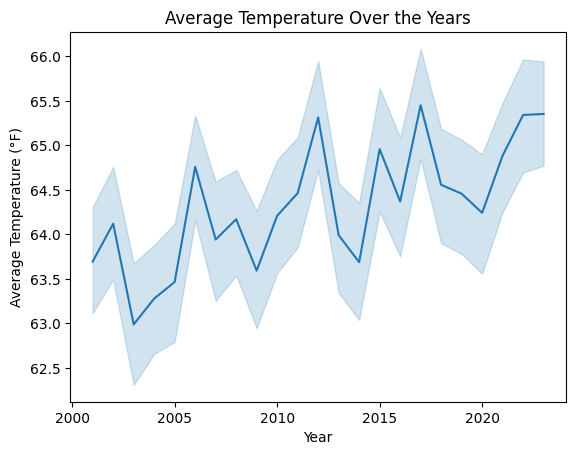

In [4]:
#graph temperature per year for the df
df = pd.read_csv('CompleteWeatherCarbonAndOzoneData.csv')
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')
df['Year'] = df['Date Local'].dt.year
df = df[['Year', 'Average Temperature']]
sns.lineplot(data=df, x='Year', y='Average Temperature')
plt.title('Average Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.show()

<Axes: xlabel='Year', ylabel='Ozone Arithmetic Mean'>

Text(0.5, 1.0, 'Average Ozone Particles Emitted Over the Years')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average Ozone Particles Emitted (ppm)')

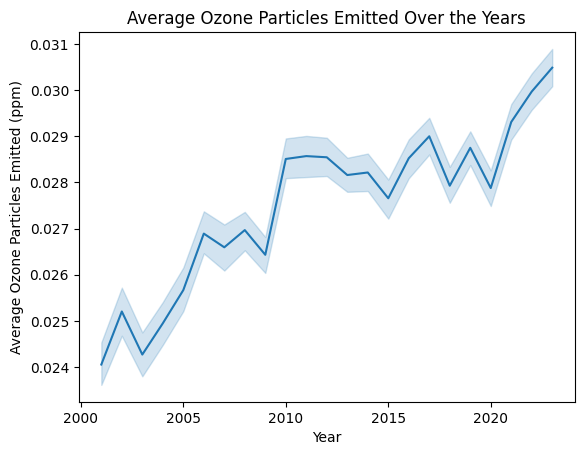

In [5]:
#graph temperature per year for the df
df = pd.read_csv('CompleteWeatherCarbonAndOzoneData.csv')
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')
df['Year'] = df['Date Local'].dt.year
df = df[['Year', 'Ozone Arithmetic Mean']]
sns.lineplot(data=df, x='Year', y='Ozone Arithmetic Mean')
plt.title('Average Ozone Particles Emitted Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Ozone Particles Emitted (ppm)')
plt.show()

##### Hypothesis 1

##### As greenhouse gas emissions in the US go up, so do the temperatures. 

,Date Local,Average Temperature,Ozone Arithmetic Mean,State Name,City Name,Site Num,Carbon Arithmetic Mean,tmax,tmin,prcp,Year,State,City
0,2001-01-01,62.0,0.008000,California,Los Angeles,1103,2.142753,76.0,48.0,0.0,2001,NaN,NaN
1,2001-01-02,61.5,0.005471,California,Los Angeles,1103,2.874818,80.0,43.0,0.0,2001,NaN,NaN
2,2001-01-03,62.5,0.006529,California,Los Angeles,1103,2.573188,80.0,45.0,0.0,2001,NaN,NaN
3,2001-01-04,65.5,0.005765,California,Los Angeles,1103,1.983334,81.0,50.0,0.0,2001,NaN,NaN
4,2001-01-05,59.5,0.001706,California,Los Angeles,1103,2.750544,70.0,49.0,0.0,2001,NaN,NaN


LinearRegression()

Text(0.5, 0, 'Greenhouse Emissions (Ozone Arithmetic Mean)')

Text(0, 0.5, 'Average Temperature (°F)')

Text(0.5, 1.0, 'Regression Analysis: Emissions vs. Temperature')

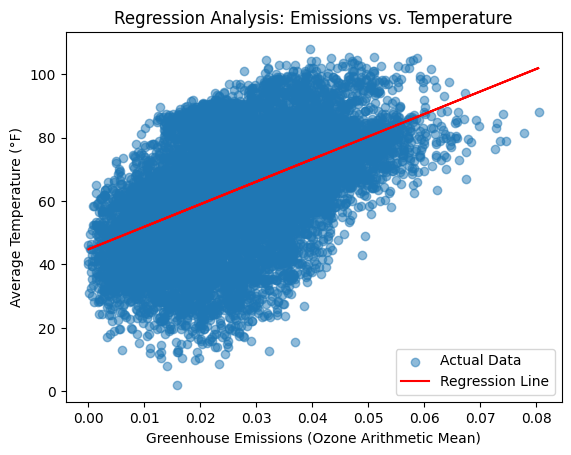

R-squared value: 0.24757626505481


In [17]:
# Load needed packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('CompleteWeatherCarbonAndOzoneData.csv')

data.head()

# Create an average temperature column
data['avg_temp'] = (data['tmax'] + data['tmin']) / 2

# Select relevant columns and drop rows with missing values
data_filtered = data[['Ozone Arithmetic Mean', 'avg_temp']].dropna()

# Split the data into features (X) and target (y)
X = data_filtered[['Ozone Arithmetic Mean']]
y = data_filtered['avg_temp']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared to assess the model
r2 = r2_score(y_test, y_pred)

# Plot the relationship and regression line
plt.scatter(X_test, y_test, label='Actual Data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Greenhouse Emissions (Ozone Arithmetic Mean)')
plt.ylabel('Average Temperature (°F)')
plt.title('Regression Analysis: Emissions vs. Temperature')
plt.legend()
plt.show()

print(f"R-squared value: {r2}")

In [ ]:
# Ensure the 'Date Local' column is in datetime format
data['Date Local'] = pd.to_datetime(data['Date Local'], errors='coerce')

# Extract the year from the 'Date Local' column
data['Year'] = data['Date Local'].dt.year

# Filter data to remove any rows with missing values in relevant columns
data_filtered_hue = data[['Carbon Arithmetic Mean', 'avg_temp', 'Year']].dropna()

# Create a scatterplot with hue based on the year
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered_hue, 
    x='Carbon Arithmetic Mean', 
    y='avg_temp', 
    hue='Year', 
    palette='viridis', 
    alpha=0.6
)

plt.title('Greenhouse Emissions vs. Average Temperature (Hue by Year)')
plt.xlabel('Greenhouse Emissions (Carbon Arithmetic Mean)')
plt.ylabel('Average Temperature (avg_temp)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Hypothesis 2

##### In other words, the rate of climate change increase is not one-to-one with the rate of greenhouse gas emissions.

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average Temperature (°F)')

Text(0, 0.5, 'Ozone Arithmetic Mean (ppm)')

Text(0.5, 1.0, 'Average Ozone Levels vs Temperature by Year')

(array([1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

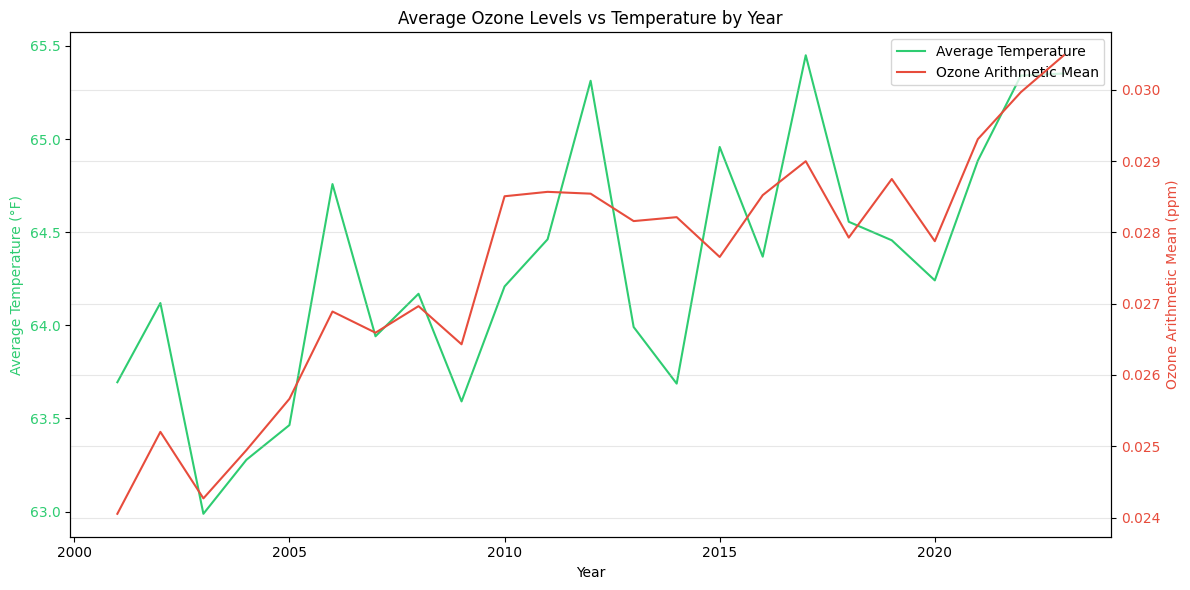

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

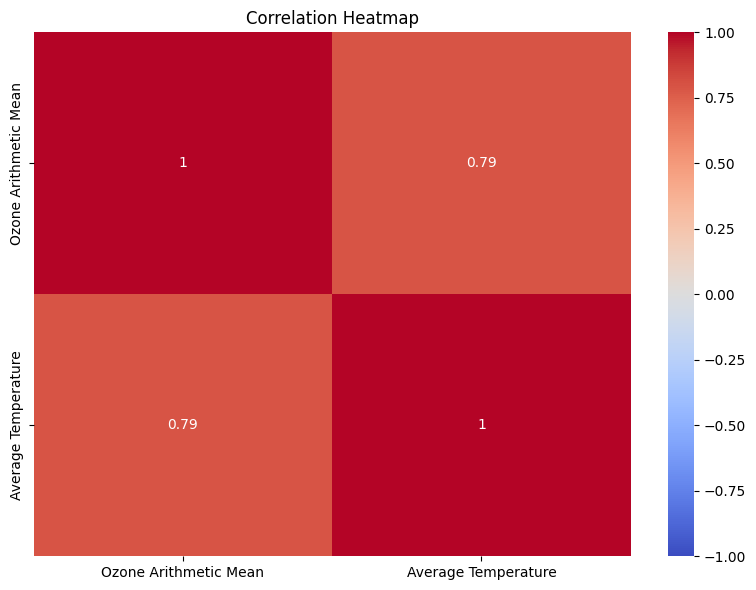

In [13]:
# plot the averages tgt on one graph
# correlation heatmap (number)

df = pd.read_csv('CompleteWeatherCarbonAndOzoneData.csv')
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')
df['Year'] = df['Date Local'].dt.year

# Calculate yearly averages
yearly_avg = df.groupby('Year').agg({
    'Ozone Arithmetic Mean': 'mean',
    'Average Temperature': 'mean'
}).reset_index()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature on primary y-axis
color1 = '#2ecc71'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°F)', color=color1)
line1 = ax1.plot(yearly_avg['Year'], yearly_avg['Average Temperature'], 
                 color=color1, label='Average Temperature')
ax1.tick_params(axis='y', labelcolor=color1)

# Create secondary y-axis for ozone
ax2 = ax1.twinx()
color2 = '#e74c3c'
ax2.set_ylabel('Ozone Arithmetic Mean (ppm)', color=color2)
line2 = ax2.plot(yearly_avg['Year'], yearly_avg['Ozone Arithmetic Mean'], 
                 color=color2, label='Ozone Arithmetic Mean')
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.title('Average Ozone Levels vs Temperature by Year')
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Create correlation heatmap
correlation = yearly_avg[['Ozone Arithmetic Mean', 'Average Temperature']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

##### Hypothesis 3

##### In 2007, SCOTUS ruled in Massachussets vs. EPA that the EPA had the authority to regulate greenhouse gasses as pollutants. This ruling was supposed to help lower greenhouse gas emissions, and should therefore have resulted in a reduction or slowing down of climate change - compared to before 2007.

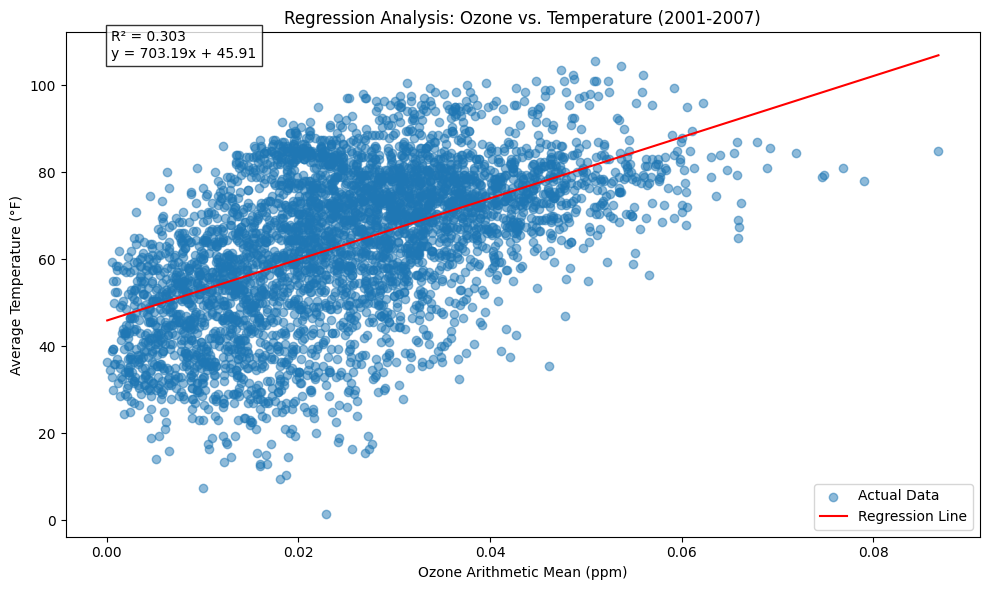

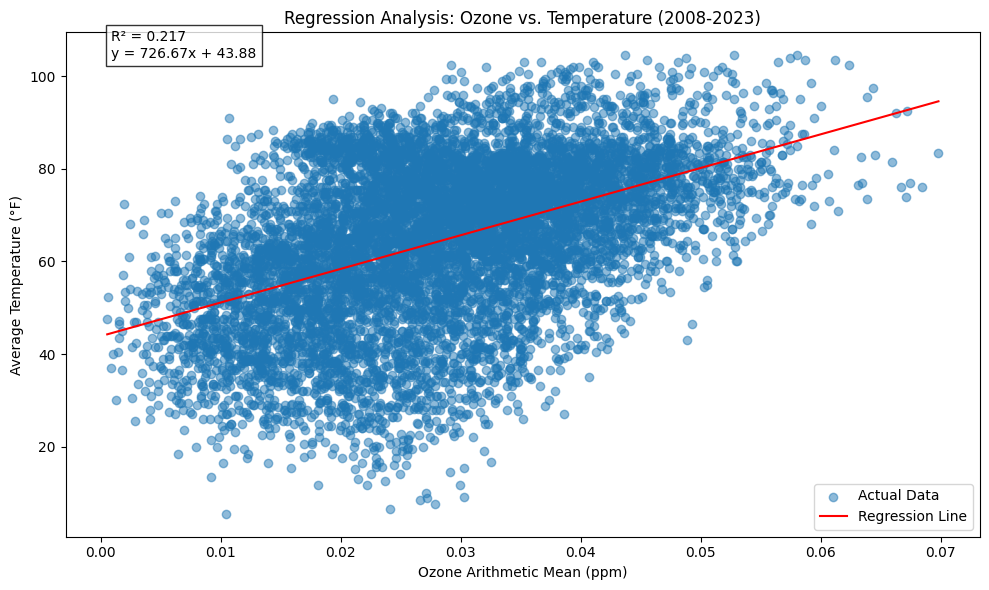


Results for 2001-2007:
R-squared: 0.3027
RMSE: 14.5579
Coefficient: 703.1897
Intercept: 45.9083

Results for 2008-2023:
R-squared: 0.2168
RMSE: 15.1635
Coefficient: 726.6673
Intercept: 43.8797


In [16]:
from sklearn.metrics import mean_squared_error
def perform_regression_analysis(df, start_year, end_year, title):
    # Filter data for the specified year range
    mask = (df['Year'] >= start_year) & (df['Year'] <= end_year)
    data_filtered = df[mask]
    
    # Select relevant columns and drop rows with missing values
    X = data_filtered[['Ozone Arithmetic Mean']].dropna()
    y = data_filtered['Average Temperature'].dropna()
    
    # Ensure X and y have the same length after dropping NA values
    common_index = X.index.intersection(y.index)
    X = X.loc[common_index]
    y = y.loc[common_index]
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Create and train the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, label='Actual Data', alpha=0.5)
    
    # Sort X_test and y_pred for proper line plotting
    sort_idx = np.argsort(X_test.values.ravel())
    X_sorted = X_test.values[sort_idx]
    y_pred_sorted = y_pred[sort_idx]
    
    plt.plot(X_sorted, y_pred_sorted, color='red', label='Regression Line')
    plt.xlabel('Ozone Arithmetic Mean (ppm)')
    plt.ylabel('Average Temperature (°F)')
    plt.title(f'Regression Analysis: {title}')
    plt.legend()
    
    # Add regression equation and R² to plot
    equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
    plt.text(0.05, 0.95, f'R² = {r2:.3f}\n{equation}', 
             transform=plt.gca().transAxes, 
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return {
        'R-squared': r2,
        'RMSE': rmse,
        'Coefficient': model.coef_[0],
        'Intercept': model.intercept_
    }

# Perform analysis for both time periods
results_2001_2007 = perform_regression_analysis(
    df, 2001, 2007, 'Ozone vs. Temperature (2001-2007)'
)
results_2008_2023 = perform_regression_analysis(
    df, 2008, 2023, 'Ozone vs. Temperature (2008-2023)'
)

# Print detailed results
print("\nResults for 2001-2007:")
for metric, value in results_2001_2007.items():
    print(f"{metric}: {value:.4f}")

print("\nResults for 2008-2023:")
for metric, value in results_2008_2023.items():
    print(f"{metric}: {value:.4f}")